<a href="https://colab.research.google.com/github/zhengchunqiu/Colorize/blob/master/Image_Colorize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DeOldify - Colorize your own photos!


DeOldify GIthub：https://github.com/jantic/DeOldify/blob/master/README.md

base code borrowed from this Google Colab.Notebookhttps://colab.research.google.com/github/jantic/DeOldify/blob/master/ImageColorizerColab.ipynb

In [0]:
from os import path
import torch

print(torch.__version__)

1.1.0


# Git clone and install DeOldify




In [0]:
!git clone https://github.com/jantic/DeOldify.git DeOldify

fatal: destination path 'DeOldify' already exists and is not an empty directory.


In [0]:
cd DeOldify/

/content/DeOldify


In [0]:
!ls

ColorizeTrainingArtistic.ipynb	   LICENSE
ColorizeTrainingStable.ipynb	   models
ColorizeTrainingVideo.ipynb	   README.md
dummy				   requirements.txt
environment.yml			   resource_images
fasterai			   result_images
ImageColorizerArtisticTests.ipynb  test_images
ImageColorizerColab.ipynb	   video
ImageColorizer.ipynb		   VideoColorizerColab.ipynb
ImageColorizerStableTests.ipynb    VideoColorizer.ipynb


In [0]:
!pip install -r requirements.txt

# Setup

In [0]:
import fastai
from fasterai.visualize import *
from pathlib import Path

torch.backends.cudnn.benchmark=True

In [0]:
!mkdir 'models'

mkdir: cannot create directory ‘models’: File exists


In [0]:
!wget wget https://www.dropbox.com/s/zkehq1uwahhbc2o/ColorizeArtistic_gen.pth?dl=0 -O ./models/ColorizeArtistic_gen.pth

--2019-05-09 08:09:47--  http://wget/
Resolving wget (wget)... failed: Name or service not known.
wget: unable to resolve host address ‘wget’
--2019-05-09 08:09:47--  https://www.dropbox.com/s/zkehq1uwahhbc2o/ColorizeArtistic_gen.pth?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.1, 2620:100:6018:1::a27d:301
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/zkehq1uwahhbc2o/ColorizeArtistic_gen.pth [following]
--2019-05-09 08:09:48--  https://www.dropbox.com/s/raw/zkehq1uwahhbc2o/ColorizeArtistic_gen.pth
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc68f77daf6180de586baff46fb0.dl.dropboxusercontent.com/cd/0/inline/Aggg-eczuWZqfT2cBQMRUHOGIUEwqPogt6E2bHLFenTwvQEWUBw9BQ4ZcTrVAsOecjttxac8aWoJgwWtsqcfLUptd-_msqZ6byoJ5Bu3F2xfBA/file# [following]
--2019-05-09 08:09:48--  https://uc68f77daf6180de586

In [0]:
colorize=get_image_colorizer(artistic=True)

/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:442: UserWarning: Your training set is empty. If this is by design, pass `ignore_empty=True` to remove this warning.
  warn("Your training set is empty. If this is by design, pass `ignore_empty=True` to remove this warning.")
/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:445: UserWarning: Your validation set is empty. If this is by design, use `split_none()`
                 or pass `ignore_empty=True` when labelling to remove this warning.
  or pass `ignore_empty=True` when labelling to remove this warning.""")


# Colorize


*   **source_url**
Type in a url to a direct link of an image. Usually that means they'll end in .png, .jpg, etc. NOTE: If you want to use your own image, upload it first to a site like Imgur.

*  **render_factor**
The default value of 35 has been carefully chosen and should work -ok- for most scenarios (but probably won't be the -best-). This determines resolution at which the color portion of the image is rendered. Lower resolution will render faster, and colors also tend to look more vibrant. Older and lower quality images in particular will generally benefit by lowering the render factor. Higher render factors are often better for higher quality images, but the colors may get slightly washed out.

*  **How to Download a Copy**
Simply right click on the displayed image and click "Save image as..."!

## Pro Tips
*  You can evaluate how well the image is rendered at each render_factor by using the code at the bottom (that cell under "See how well render_factor values perform on a frame here").
*  Keep in mind again that you can go up top and set artistic to False for the colorizer to use the 'Stable' model instead. This will often tend to do better on portraits, and natural landscapes.
## Troubleshooting
If you get a 'CUDA out of memory' error, you probably have the render_factor too high. The max is 45 on 11GB video cards.




In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

#plt.style.use({'figure.figsize':(12, 8)})
sns.set(style='whitegrid')

NameError: ignored

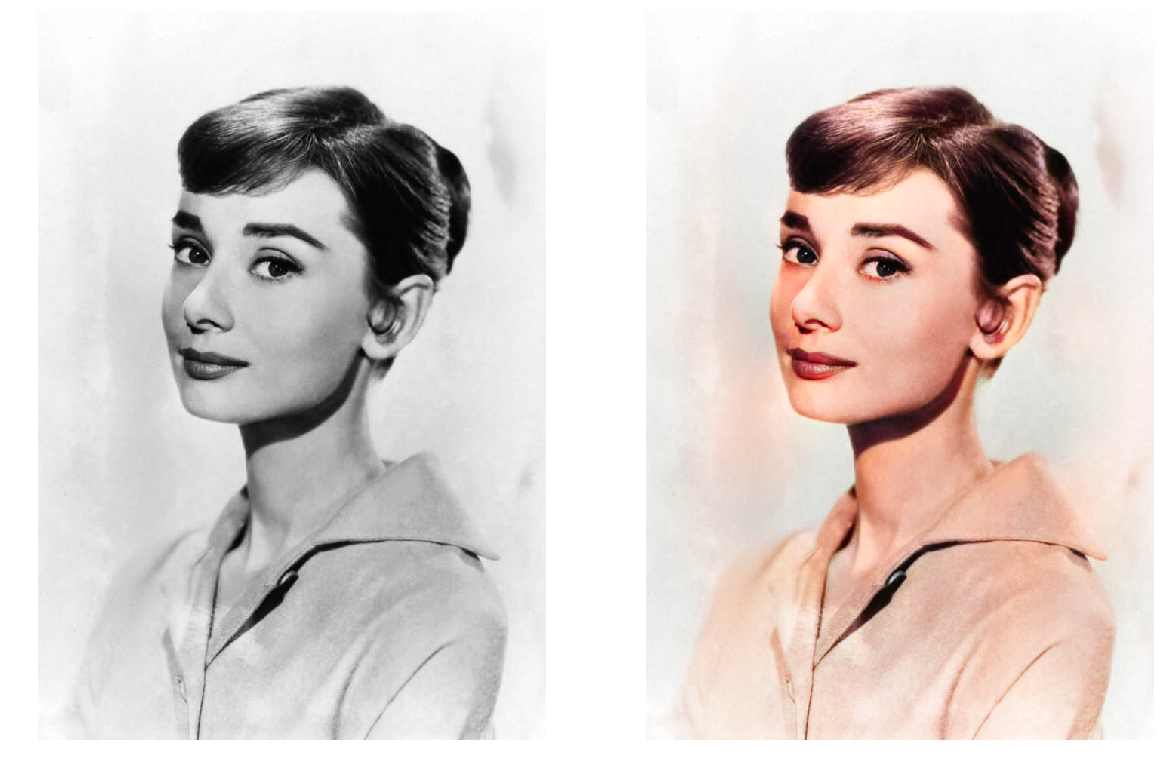

In [0]:
source_url='https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1557392891983&di=205c7b4da7dae284835db01d24d02ece&imgtype=0&src=http%3A%2F%2Fimg.ph.126.net%2FaNbwp33Ay72hovYDHLEhwg%3D%3D%2F1002332392083452398.jpg' #@param {type:"string"}
render_factor=35 #@param {type:"slider",min:7,max:45}

if source_url is not None and source_url !='':
  imgage_path=colorize.plot_transformed_image_from_url(url=source_url,
                                                       render_factor=render_factor,
                                                       compare=True)
  show_image_in_notebook(image_path)
else:
  print('Provide an image url and try again.')

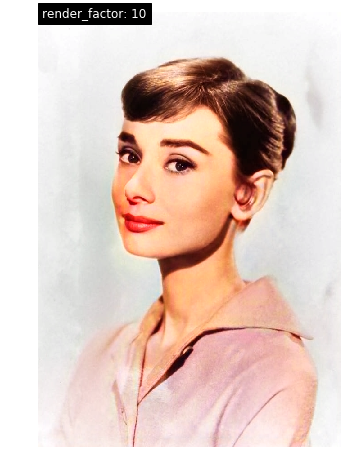

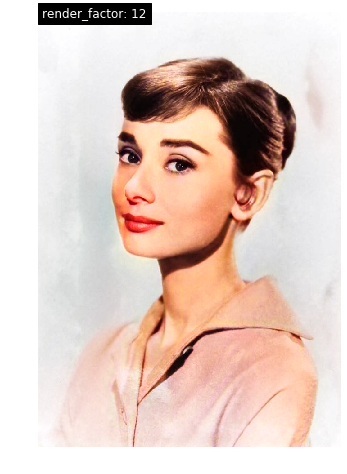

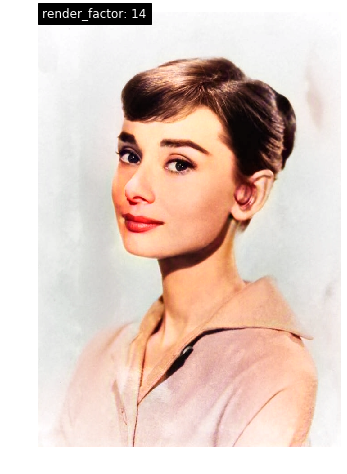

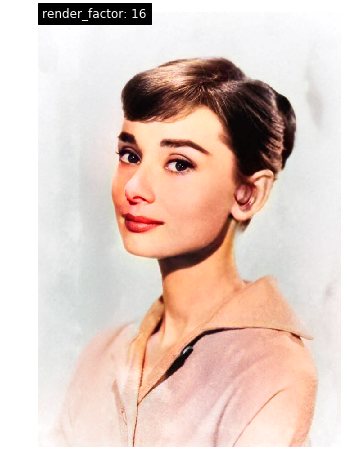

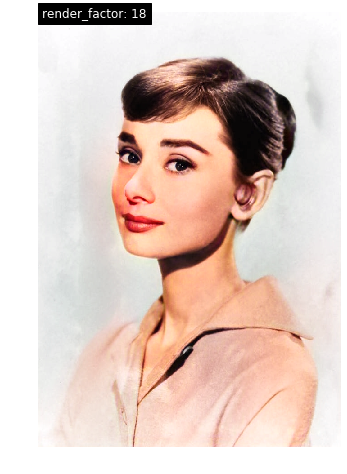

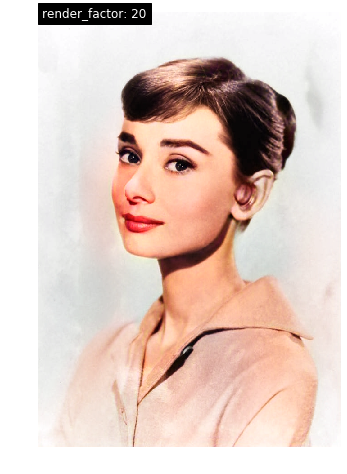

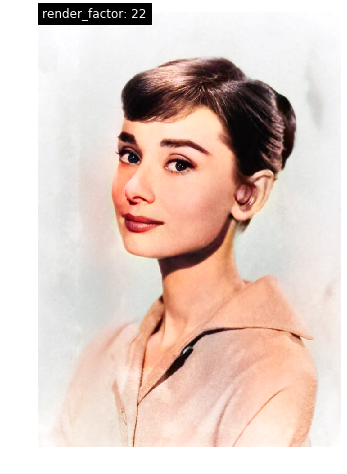

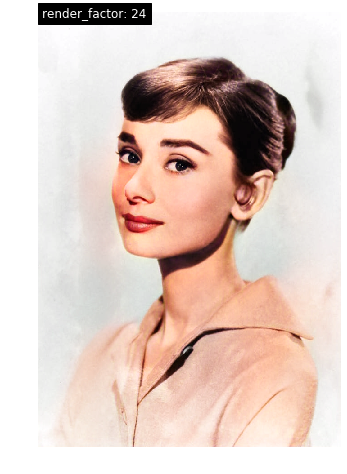

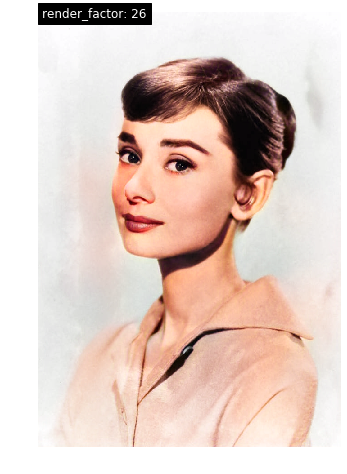

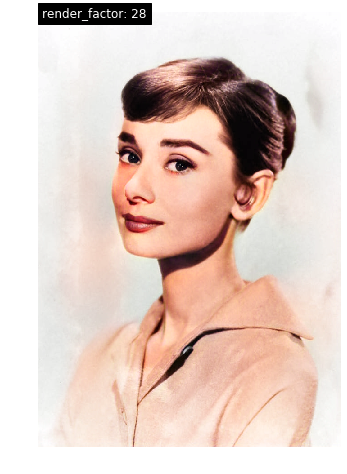

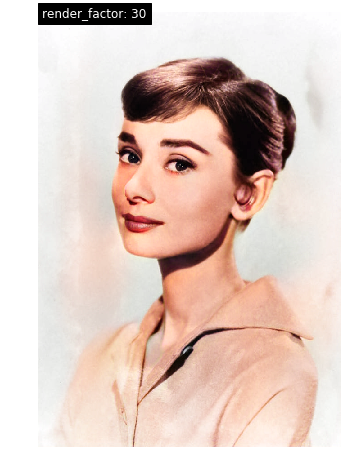

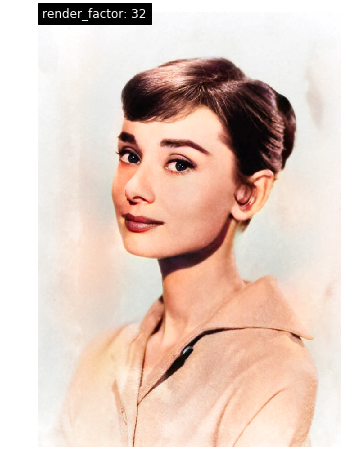

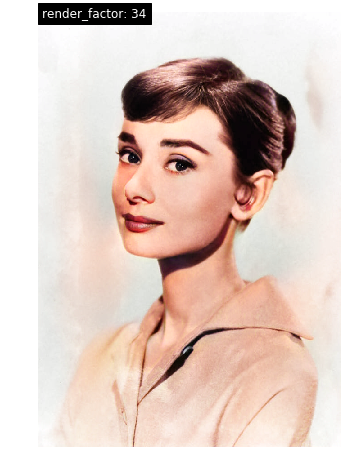

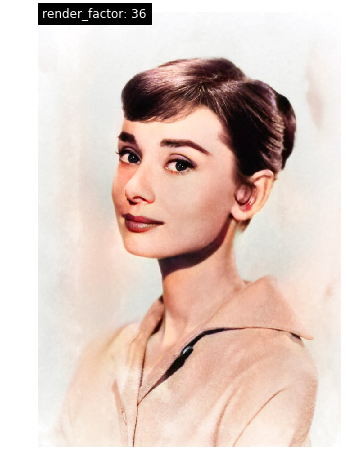

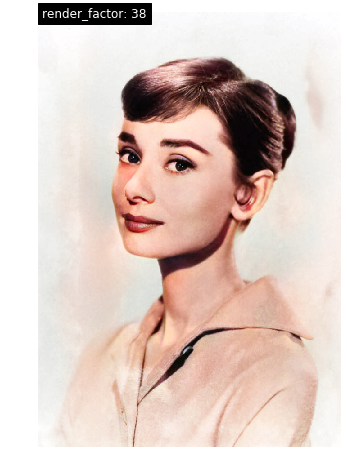

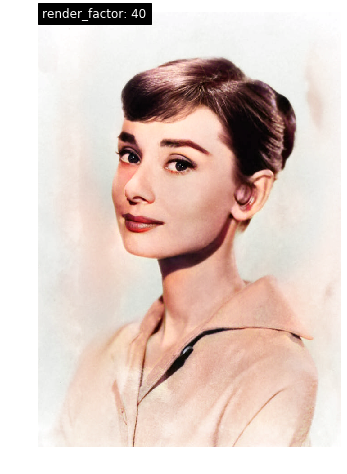

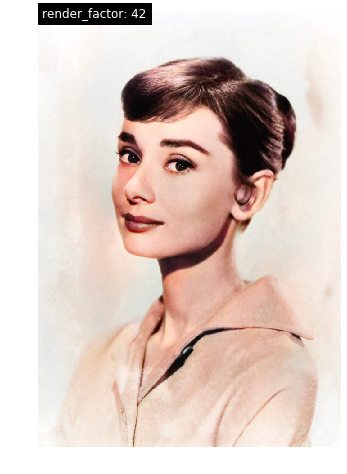

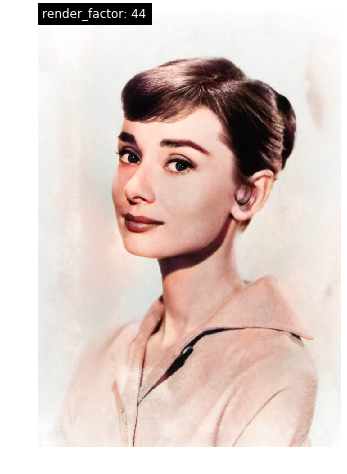

In [0]:
for i in range(10,46,2):
  colorize.plot_transformed_image('test_images/image.png',render_factor=i,display_render_factor=True,figsize=(8,8))